In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import joblib
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv("/content/preproced_data.csv")

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,resume_text,job_role,text_length,char_length,cleaned_text
0,0,0,ACCOUNTANT\nSummary\nFinancial Accountant spec...,ACCOUNTANT,3466,24159,accountant summary financial accountant specia...
1,1,1,STAFF ACCOUNTANT\nSummary\nHighly analytical a...,ACCOUNTANT,1047,7493,staff accountant summary highly analytical det...
2,2,2,ACCOUNTANT\nProfessional Summary\nTo obtain a ...,ACCOUNTANT,628,4749,accountant professional summary obtain positio...
3,3,3,SENIOR ACCOUNTANT\nExperience\nCompany Name Ju...,ACCOUNTANT,849,5922,senior accountant experience company name june...
4,4,4,SENIOR ACCOUNTANT\nProfessional Summary\nSenio...,ACCOUNTANT,783,5574,senior accountant professional summary senior ...
...,...,...,...,...,...,...,...
2476,2476,2479,READING TEACHER\nSummary\nI am a highly motiva...,TEACHER,845,6078,reading teacher summary highly motivated educa...
2477,2477,2480,HISTORY TEACHER\nProfessional Summary\nTo be e...,TEACHER,1165,9197,history teacher professional summary employed ...
2478,2478,2481,"TEACHER\nSummary\nHighly ethical, dependable, ...",TEACHER,926,6611,teacher summary highly ethical dependable dili...
2479,2479,2482,TEACHER\nSummary\nTalented early education pro...,TEACHER,663,5163,teacher summary talented early education profe...


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df['job_role_encoded'] = label_encoder.fit_transform(df['job_role'])

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,resume_text,job_role,text_length,char_length,cleaned_text,job_role_encoded
0,0,0,ACCOUNTANT\nSummary\nFinancial Accountant spec...,ACCOUNTANT,3466,24159,accountant summary financial accountant specia...,0
1,1,1,STAFF ACCOUNTANT\nSummary\nHighly analytical a...,ACCOUNTANT,1047,7493,staff accountant summary highly analytical det...,0
2,2,2,ACCOUNTANT\nProfessional Summary\nTo obtain a ...,ACCOUNTANT,628,4749,accountant professional summary obtain positio...,0
3,3,3,SENIOR ACCOUNTANT\nExperience\nCompany Name Ju...,ACCOUNTANT,849,5922,senior accountant experience company name june...,0
4,4,4,SENIOR ACCOUNTANT\nProfessional Summary\nSenio...,ACCOUNTANT,783,5574,senior accountant professional summary senior ...,0


In [ ]:
X = df["cleaned_text"]
y = df["job_role_encoded"]

In [ ]:
y

,job_role_encoded
0,0
1,0
2,0
3,0
4,0
...,...
2476,23
2477,23
2478,23
2479,23


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_test

,cleaned_text
1434,global digital servicing digital onboarding co...
1949,sr hr generalist summary qualitydriven analyti...
2444,teacher summary dedicated teacher marine corp ...
2319,sale associate summary motivated student seeki...
1167,consultant professional profile obtain tax acc...
...,...
904,business development consultant summary experi...
1338,graphic designer illustrator summary raised ch...
1233,wms consultant objective looking position supp...
482,operation coordinator summary dedicated focuse...


In [ ]:
X_train

,cleaned_text
2190,administrative assistant summary determined pr...
35,project accountant professional summary obtain...
1587,student finance consultant summary customer se...
1778,branch manager summary year successful experie...
1304,freelance website designer summary marine corp...
...,...
925,chef owner executive profile combination speci...
523,datastage etl developer summary year etl exper...
1425,digital medium producer summary experienced in...
381,stylist objective internship opportunity marke...


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [ ]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Model Building

In [ ]:
model_performance_df = pd.DataFrame(columns=[
    "Model", "Dataset", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"
])

def evaluate_multiclass_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    print(f"\n{'='*30} {model_name} {'='*30}")


    model.fit(X_train, y_train)


    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(X_test)
    else:
        y_test_prob = model.decision_function(X_test)


    for dataset_name, X, y_true, y_pred in [("Train", X_train, y_train, y_train_pred),
                                            ("Test", X_test, y_test, y_test_pred)]:

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average="weighted")
        recall = recall_score(y_true, y_pred, average="weighted")
        f1 = f1_score(y_true, y_pred, average="weighted")


        y_true_bin = label_binarize(y_true, classes=np.unique(y_train))
        if y_test_prob.ndim == 1:
            y_test_prob = np.expand_dims(y_test_prob, axis=1)

        roc_auc = roc_auc_score(y_true_bin, y_test_prob, multi_class="ovr") if dataset_name == "Test" else None


        model_performance_df.loc[len(model_performance_df)] = [
            model_name, dataset_name, accuracy, precision, recall, f1, roc_auc
        ]


        print(f"\n{model_name} ({dataset_name}) Performance:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        if dataset_name == "Test":
            print(f"ROC-AUC: {roc_auc:.4f}")


        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="cividis")
        plt.title(f"{model_name} - {dataset_name} - Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()


    n_classes = y_true_bin.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc_curve = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_test_prob[:, i])
        roc_auc_curve[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc_curve[i]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Chance")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title(f"{model_name} - ROC-AUC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()


    #model_filename = f"models/{model_name.replace(' ', '_').lower()}_model.pkl"
    #joblib.dump(model, model_filename)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric="mlogloss", use_label_encoder=False)
}


============================== Logistic Regression ==============================


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression (Train) Performance:
Accuracy: 0.8125
Precision: 0.8205
Recall: 0.8125
F1-Score: 0.8038


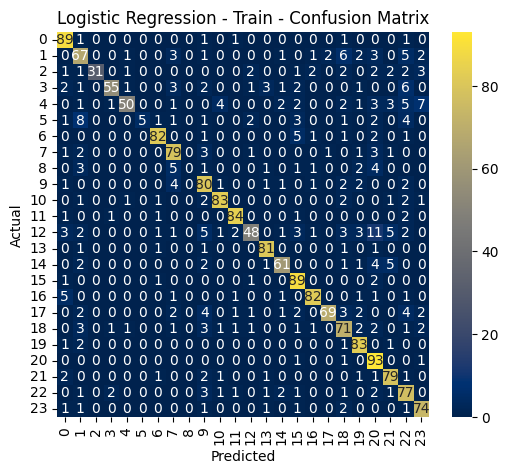

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-33-3f8666ff7d35>:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance_df.loc[len(model_performance_df)] = [



Logistic Regression (Test) Performance:
Accuracy: 0.6459
Precision: 0.6651
Recall: 0.6459
F1-Score: 0.6368
ROC-AUC: 0.9498


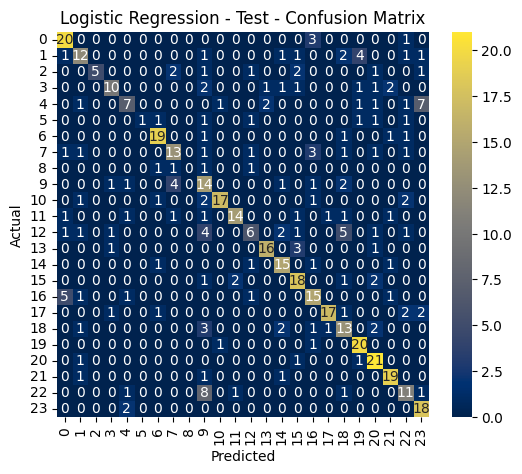

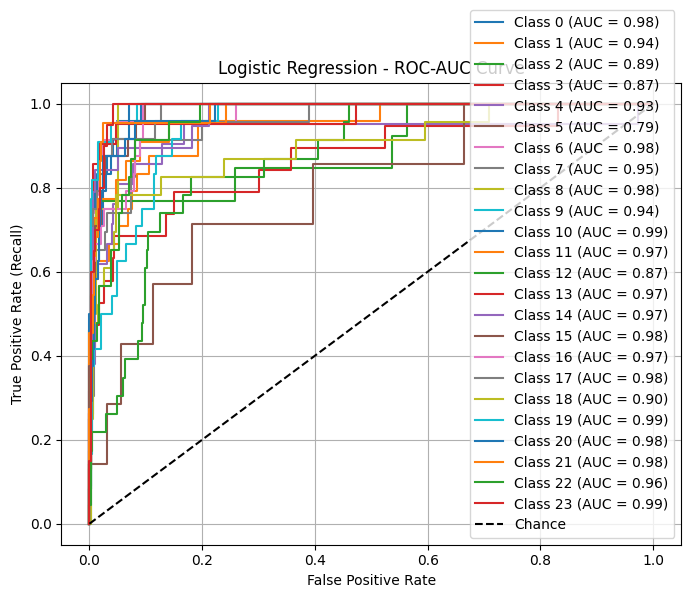


============================== Decision Tree ==============================


<ipython-input-33-3f8666ff7d35>:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance_df.loc[len(model_performance_df)] = [



Decision Tree (Train) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


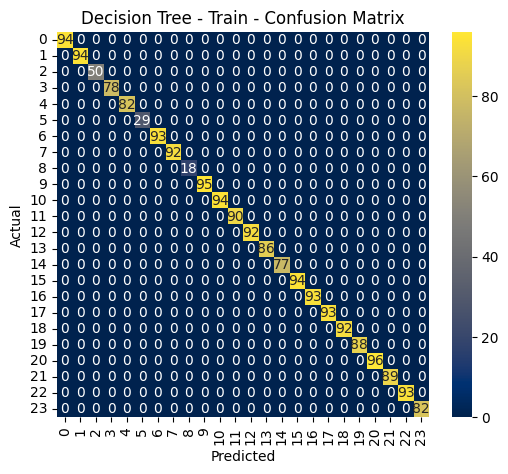


Decision Tree (Test) Performance:
Accuracy: 0.5594
Precision: 0.5777
Recall: 0.5594
F1-Score: 0.5615
ROC-AUC: 0.7560


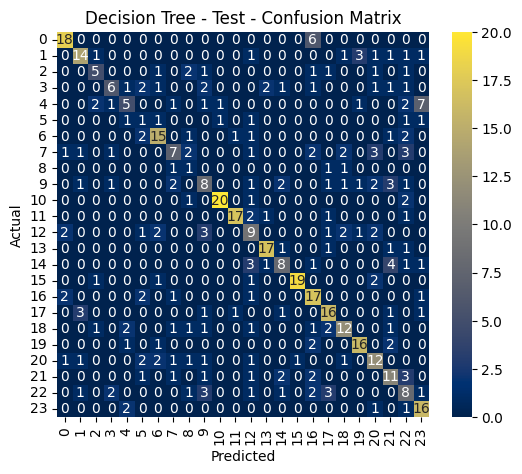

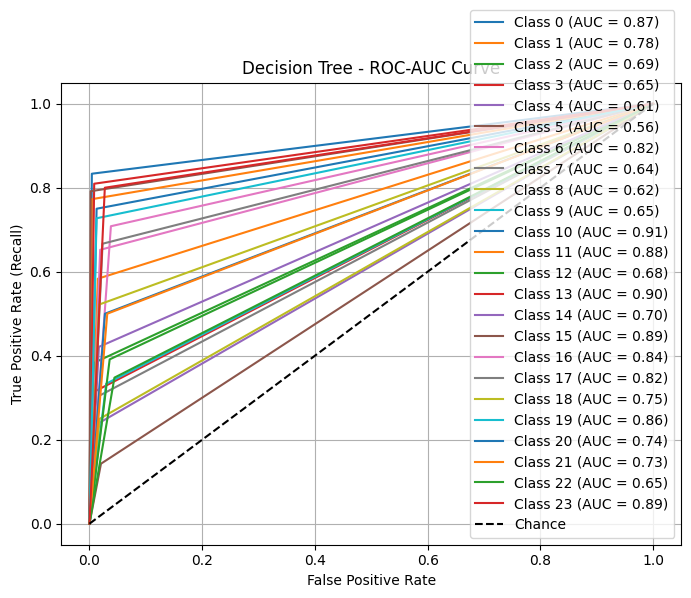


============================== Random Forest ==============================


<ipython-input-33-3f8666ff7d35>:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance_df.loc[len(model_performance_df)] = [



Random Forest (Train) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


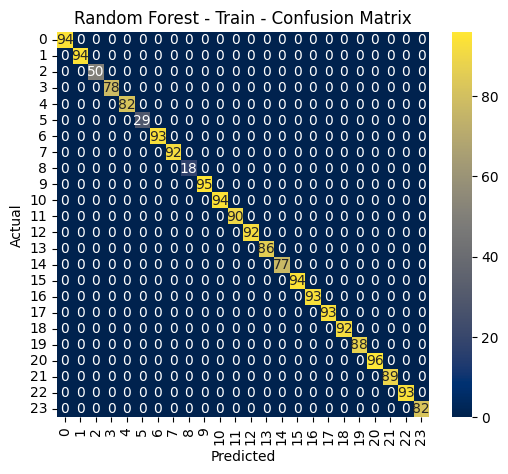

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest (Test) Performance:
Accuracy: 0.6197
Precision: 0.6281
Recall: 0.6197
F1-Score: 0.5910
ROC-AUC: 0.9285


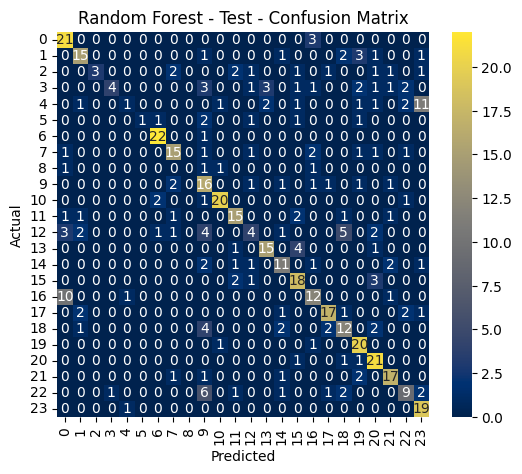

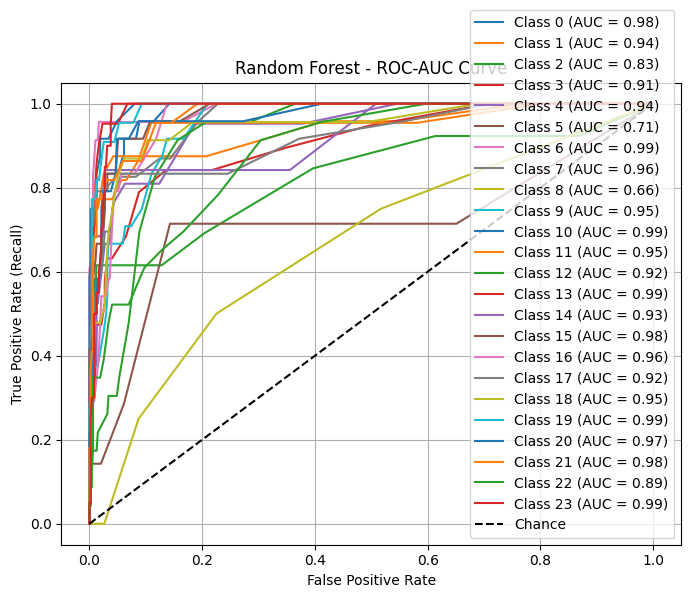


============================== SVM ==============================


<ipython-input-33-3f8666ff7d35>:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance_df.loc[len(model_performance_df)] = [



SVM (Train) Performance:
Accuracy: 0.9698
Precision: 0.9711
Recall: 0.9698
F1-Score: 0.9696


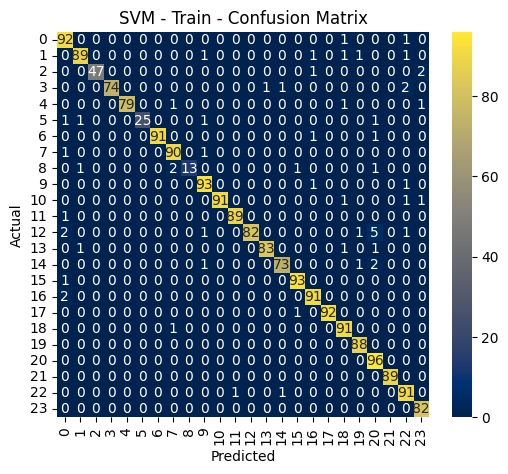

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



SVM (Test) Performance:
Accuracy: 0.6097
Precision: 0.6495
Recall: 0.6097
F1-Score: 0.6109
ROC-AUC: 0.9420


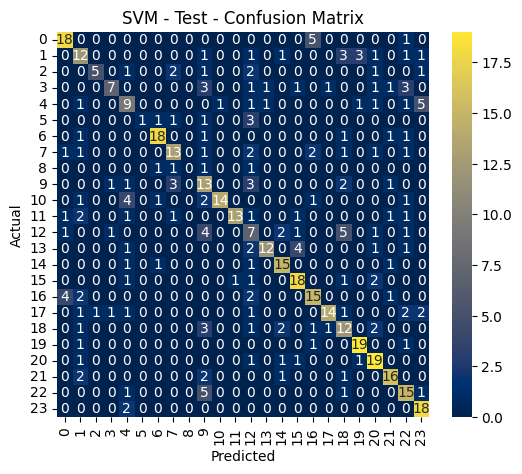

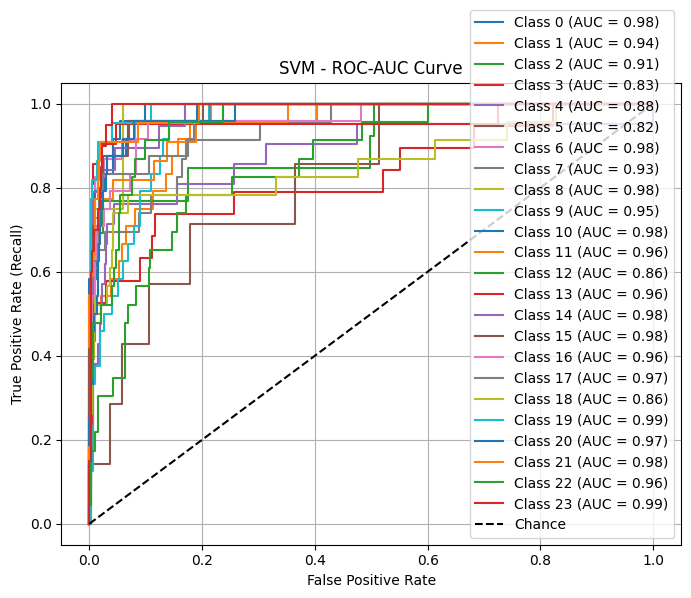


============================== KNN ==============================


<ipython-input-33-3f8666ff7d35>:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance_df.loc[len(model_performance_df)] = [



KNN (Train) Performance:
Accuracy: 0.6552
Precision: 0.6595
Recall: 0.6552
F1-Score: 0.6491


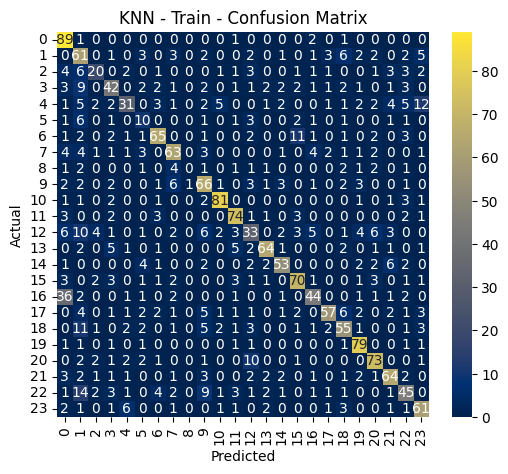


KNN (Test) Performance:
Accuracy: 0.5231
Precision: 0.5548
Recall: 0.5231
F1-Score: 0.5197
ROC-AUC: 0.8262


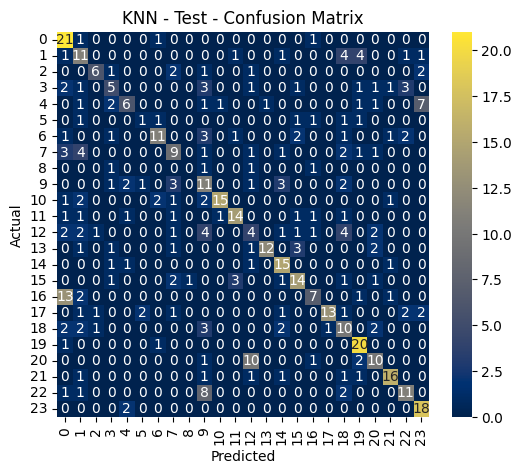

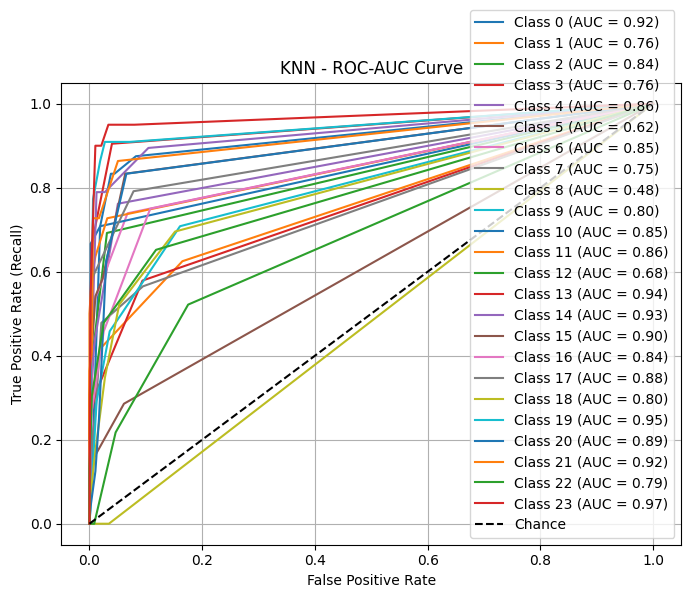


============================== AdaBoost ==============================


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-33-3f8666ff7d35>:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance_df.loc[len(model_performance_df)] = [



AdaBoost (Train) Performance:
Accuracy: 0.4264
Precision: 0.5556
Recall: 0.4264
F1-Score: 0.4042


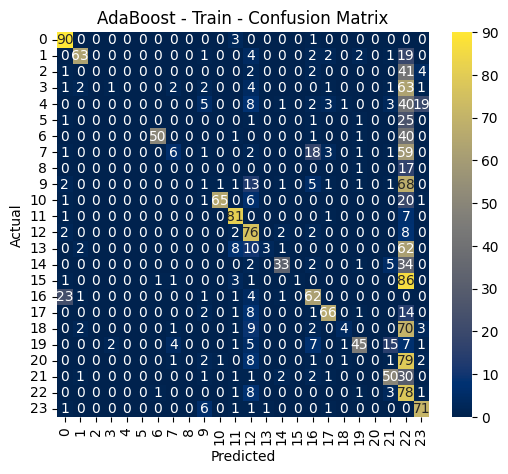

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



AdaBoost (Test) Performance:
Accuracy: 0.4085
Precision: 0.4095
Recall: 0.4085
F1-Score: 0.3821
ROC-AUC: 0.8509


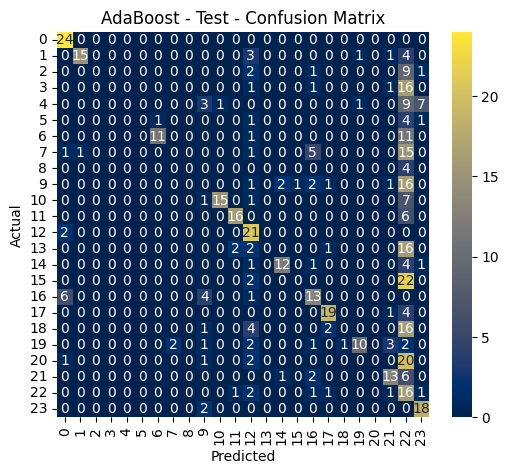

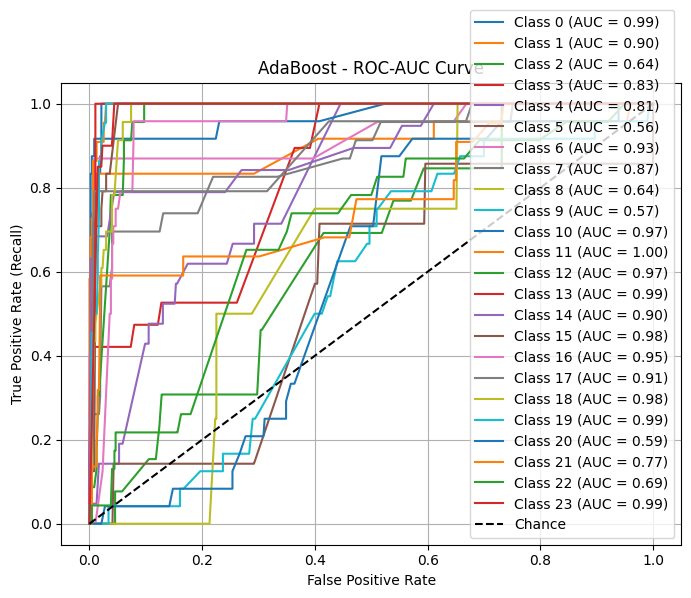


============================== Gradient Boosting ==============================


<ipython-input-33-3f8666ff7d35>:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance_df.loc[len(model_performance_df)] = [



Gradient Boosting (Train) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


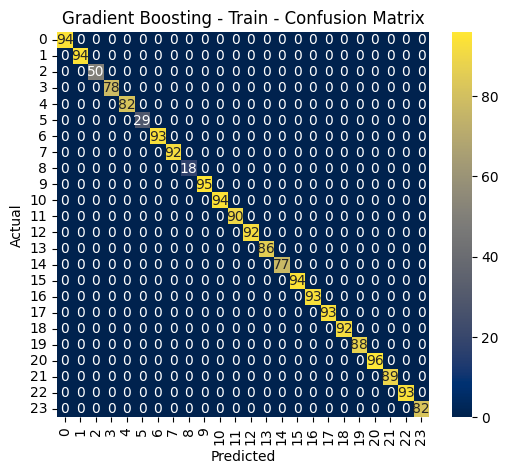


Gradient Boosting (Test) Performance:
Accuracy: 0.7082
Precision: 0.7183
Recall: 0.7082
F1-Score: 0.7083
ROC-AUC: 0.9456


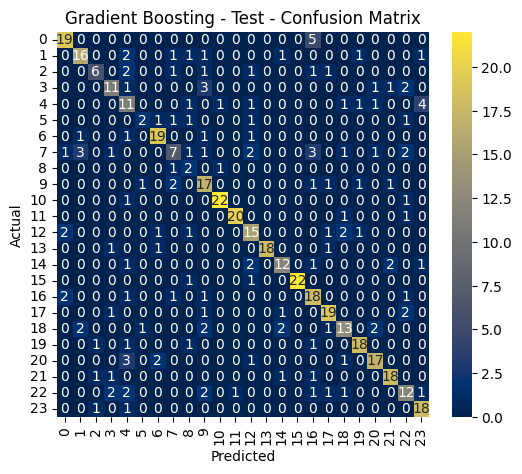

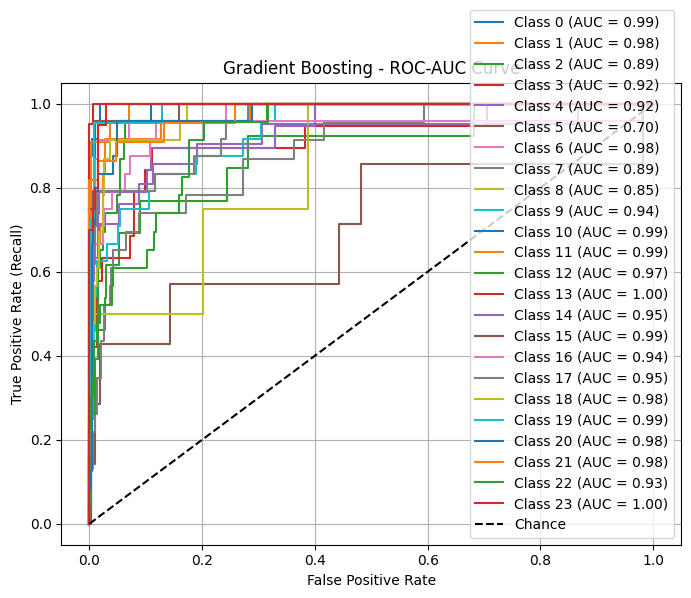


============================== XGBoost ==============================


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:33:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-33-3f8666ff7d35>:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance_df.loc[len(model_performance_df)] = [



XGBoost (Train) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


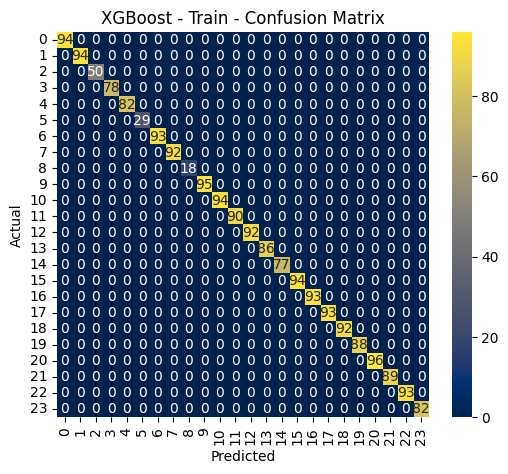


XGBoost (Test) Performance:
Accuracy: 0.7264
Precision: 0.7316
Recall: 0.7264
F1-Score: 0.7180
ROC-AUC: 0.9579


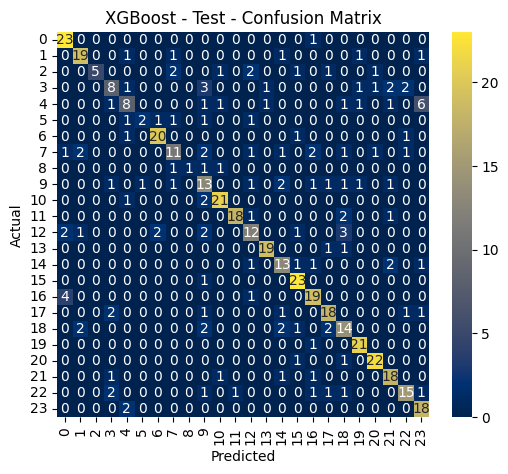

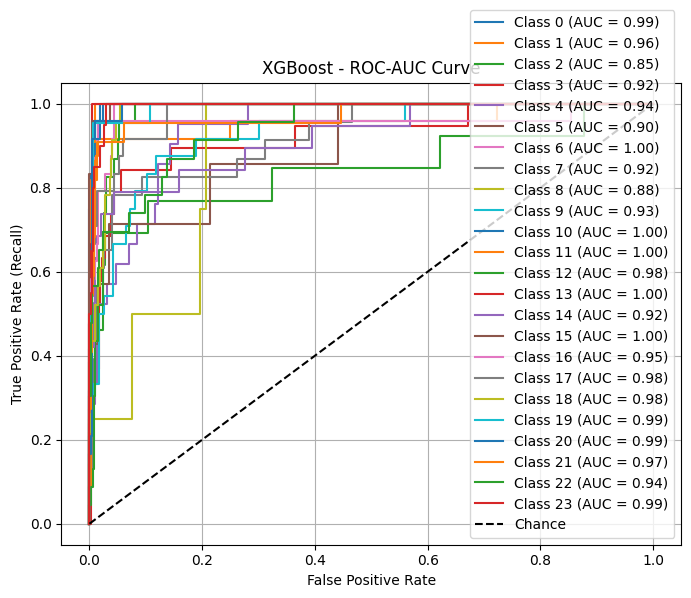

In [ ]:
for model_name, model in models.items():
    evaluate_multiclass_model(model, X_train_tfidf, X_test_tfidf, y_train, y_test, model_name=model_name)

In [ ]:
model_performance_df

,Model,Dataset,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,Train,0.812500,0.820542,0.812500,0.803774,NaN
1,Logistic Regression,Test,0.645875,0.665101,0.645875,0.636791,0.949811
2,Decision Tree,Train,1.000000,1.000000,1.000000,1.000000,NaN
3,Decision Tree,Test,0.559356,0.577738,0.559356,0.561528,0.755956
4,Random Forest,Train,1.000000,1.000000,1.000000,1.000000,NaN
5,Random Forest,Test,0.619718,0.628096,0.619718,0.590951,0.928505
6,SVM,Train,0.969758,0.971100,0.969758,0.969619,NaN
7,SVM,Test,0.609658,0.649492,0.609658,0.610921,0.942006
8,KNN,Train,0.655242,0.659534,0.655242,0.649118,NaN
9,KNN,Test,0.523139,0.554798,0.523139,0.519712,0.826227


htyperparameter tuning

In [ ]:
models = {
    #"Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric="mlogloss"),
    #"SVM": SVC(probability=True)
}

In [ ]:
param_grids = {
   #"Gradient Boosting": {"n_estimators": [50, 100, 150], "learning_rate": [0.01, 0.1, 0.2]},
    "XGBoost": {"n_estimators": [50, 100, 150], "learning_rate": [0.01, 0.1, 0.2]},
    #"SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
}

In [ ]:
tuning_results = []

In [ ]:
for model_name, model in models.items():
    print(f"\nTuning {model_name}...")


    grid = GridSearchCV(model, param_grids[model_name], cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
    grid.fit(X_train_tfidf, y_train)
    best_model = grid.best_estimator_


    y_train_pred = best_model.predict(X_train_tfidf)
    train_acc = accuracy_score(y_train, y_train_pred)

    y_test_pred = best_model.predict(X_test_tfidf)
    y_test_prob = best_model.predict_proba(X_test_tfidf)
    test_acc = accuracy_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(pd.get_dummies(y_test), y_test_prob, multi_class='ovr')


    print(f"Best Parameters for {model_name}: {grid.best_params_}")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")


    model_filename = f"{model_name.replace(' ', '_').lower()}_best_model.pkl"
    joblib.dump(best_model, model_filename)


    tuning_results.append({
        "Model": model_name,
        "Best Parameters": grid.best_params_,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "ROC-AUC": roc_auc,
        "Model File": model_filename
    })




Tuning XGBoost...
Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [ ]:
results_df = pd.DataFrame(tuning_results)


Tuning Logistic Regression...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters for Logistic Regression: {'C': 10}
Train Accuracy: 0.9990
Test Accuracy: 0.6901
ROC-AUC Score: 0.9529

Tuning Random Forest...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters for Random Forest: {'max_depth': 15, 'n_estimators': 100}
Train Accuracy: 0.9864
Test Accuracy: 0.6076
ROC-AUC Score: 0.9355


Tuning Gradient Boosting...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 150}
Train Accuracy: 1.0000
Test Accuracy: 0.7183
ROC-AUC Score: 0.9426